In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import numpy as np
import datetime
from datetime import date

In [2]:
# Read in CSV file
dna_rna_clean = pd.read_csv('Resources/CSV files for DNA and RNA/dna_rna_combined.csv')
dna_rna_clean = dna_rna_clean.set_index('Entry ID')
dna_rna_clean.head()

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID
101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA
103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA


In [3]:
# Remove rows with all NaN
dna_rna_clean = dna_rna_clean.dropna(how = "all")
dna_rna_clean.head()

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID
101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA
102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA
103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA
104D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,104D,7.45,NaN,NaN,NaN,DNA-RNA HYBRID


In [4]:
# Create DF for only X-Ray Diffraction
diffraction_df = dna_rna_clean.loc[dna_rna_clean['Experimental Method']=="X-RAY DIFFRACTION"]
diffraction_df.head()


,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID
101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA
102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA
109D,X-RAY DIFFRACTION,1995-05-08,NaN,NaN,NaN,NaN,NaN,109D,7.75,1.0,NaN,2,DNA
110D,X-RAY DIFFRACTION,1993-04-15,NaN,NaN,NaN,NaN,NaN,110D,2.34,1.0,NaN,1.9,DNA


In [5]:
# Count to verify all lines have a Molecular Weight
diffraction_df.count()

Experimental Method                     2729
Release Date                            2729
Ligand                                    53
Value                                     53
Symbol                                     0
Type                                      53
Unit                                      53
PDB ID                                  2729
Molecular Weight per Deposited Model    2729
Number of Distinct DNA Entities         1565
Number of Distinct Protein Entities        0
Resolution (Å)                          2729
Stucture Keywords                       2729
dtype: int64

In [6]:
# Create DF for only Solution NMR
solution_nmr_df = dna_rna_clean.loc[dna_rna_clean['Experimental Method']=="SOLUTION NMR"]
solution_nmr_df.head()

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA
104D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,104D,7.45,NaN,NaN,NaN,DNA-RNA HYBRID
105D,SOLUTION NMR,1995-02-07,NaN,NaN,NaN,NaN,NaN,105D,3.35,1.0,NaN,NaN,DNA
106D,SOLUTION NMR,1995-02-07,NaN,NaN,NaN,NaN,NaN,106D,3.09,1.0,NaN,NaN,DNA
107D,SOLUTION NMR,1995-05-08,NaN,NaN,NaN,NaN,NaN,107D,4.74,2.0,NaN,NaN,DNA


In [7]:
# Count to verify all lines have a Molecular Weight
solution_nmr_df.count()

Experimental Method                     1465
Release Date                            1465
Ligand                                    21
Value                                     21
Symbol                                     0
Type                                      21
Unit                                      21
PDB ID                                  1465
Molecular Weight per Deposited Model    1465
Number of Distinct DNA Entities          886
Number of Distinct Protein Entities        0
Resolution (Å)                             0
Stucture Keywords                       1465
dtype: int64

In [8]:
# Set the Release Date column to datetime
dna_rna_clean["Release Date"] = pd.to_datetime(dna_rna_clean["Release Date"])
dna_rna_clean.head()

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Entry ID,,,,,,,,,,,,,
100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID
101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA
102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA
103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA
104D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,104D,7.45,NaN,NaN,NaN,DNA-RNA HYBRID


In [9]:
# Find the range for Release Date
max_date = dna_rna_clean['Release Date'].max()
min_date = dna_rna_clean['Release Date'].min()

print(f"The dates range from {min_date} to {max_date}.")

The dates range from 1978-04-12 00:00:00 to 2023-10-25 00:00:00.


In [10]:
# Create bins for dates
bins = [np.datetime64(date(1978,1,1)), np.datetime64(date(1979,1,1)), np.datetime64(date(1984,1,1)), 
        np.datetime64(date(1989,1,1)), np.datetime64(date(1994,4,1)), np.datetime64(date(1999,4,1)), 
        np.datetime64(date(2004,4,1)), np.datetime64(date(2009,4,1)), np.datetime64(date(2014,4,1)), 
        np.datetime64(date(2019,1,1)), np.datetime64(date(2023,12,31))]

# Create the names for the bins
group_names = ["1978", "1979 - 1983", "1984 - 1988", "1989 - 1993", "1994 - 1998", "1999 - 2003", "2004 - 2008", 
               "2009 - 2013", "2014 - 2018", "2019 - 2023"]

dna_rna_clean["Date Group"] = pd.cut(dna_rna_clean["Release Date"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)
dna_rna_clean.head()

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords,Date Group
Entry ID,,,,,,,,,,,,,,
100D,X-RAY DIFFRACTION,1995-03-31,NaN,NaN,NaN,NaN,NaN,100D,6.36,NaN,NaN,1.9,DNA-RNA HYBRID,1994 - 1998
101D,X-RAY DIFFRACTION,1995-02-27,NaN,NaN,NaN,NaN,NaN,101D,7.94,1.0,NaN,2.25,DNA,1994 - 1998
102D,X-RAY DIFFRACTION,1995-02-07,NaN,NaN,NaN,NaN,NaN,102D,7.64,1.0,NaN,2.2,DNA,1994 - 1998
103D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,103D,7.50,1.0,NaN,NaN,DNA,1994 - 1998
104D,SOLUTION NMR,1995-03-31,NaN,NaN,NaN,NaN,NaN,104D,7.45,NaN,NaN,NaN,DNA-RNA HYBRID,1994 - 1998


In [11]:
# Group the results by Date Group
dna_rna_dategroup = dna_rna_clean.groupby("Date Group")
dna_rna_dategroup.count()

,Experimental Method,Release Date,Ligand,Value,Symbol,Type,Unit,PDB ID,Molecular Weight per Deposited Model,Number of Distinct DNA Entities,Number of Distinct Protein Entities,Resolution (Å),Stucture Keywords
Date Group,,,,,,,,,,,,,
1978,1,1,0,0,0,0,0,1,1,0,0,1,1
1979 - 1983,8,8,0,0,0,0,0,8,8,7,0,8,8
1984 - 1988,15,15,0,0,0,0,0,15,15,9,0,15,15
1989 - 1993,140,140,0,0,0,0,0,140,140,134,0,126,140
1994 - 1998,471,471,3,3,0,3,3,471,471,347,0,257,471
1999 - 2003,635,635,16,16,0,16,16,635,635,389,0,308,635
2004 - 2008,665,665,20,20,0,20,20,665,665,301,0,404,665
2009 - 2013,640,640,35,35,0,35,35,640,640,324,0,400,640
2014 - 2018,650,650,0,0,0,0,0,650,650,308,0,465,650


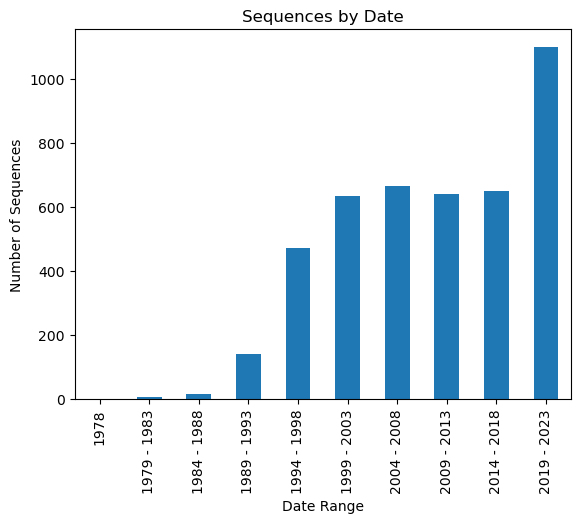

In [12]:
# Create chart data
dna_rna_release = dna_rna_dategroup['Release Date'].count()
# Chart our data, give it a title, and label the axes
release_chart = dna_rna_release.plot(kind="bar", title="Sequences by Date")
release_chart.set_xlabel("Date Range")
release_chart.set_ylabel("Number of Sequences")
plt.savefig('Images/Sequence_by_date.jpg', format = 'jpg', dpi = 1200)


plt.show()


In [13]:
# Create DF for Experimental Method of Diffraction
diffraction_group = dna_rna_clean.loc[dna_rna_clean['Experimental Method'] == "X-RAY DIFFRACTION"]
diffraction_group = diffraction_group.groupby('Date Group')
# Create chart data
diffraction_release = diffraction_group['Release Date'].count()

# Create DF for Experimental Method of NMR
nmr_group = dna_rna_clean.loc[dna_rna_clean['Experimental Method'] == "SOLUTION NMR"]
nmr_group = nmr_group.groupby('Date Group')
# Create chart data
nmr_release = nmr_group['Release Date'].count()

# Put them into one DF
release_by_method = pd.merge(diffraction_release, nmr_release, left_index=True, right_index=True).rename(
    columns = {'Release Date_x':'X-Ray Diffraction', 'Release Date_y':'Solution NMR'})
release_by_method


,X-Ray Diffraction,Solution NMR
Date Group,,
1978,1,0
1979 - 1983,8,0
1984 - 1988,15,0
1989 - 1993,126,14
1994 - 1998,256,213
1999 - 2003,302,326
2004 - 2008,393,260
2009 - 2013,387,239
2014 - 2018,459,184


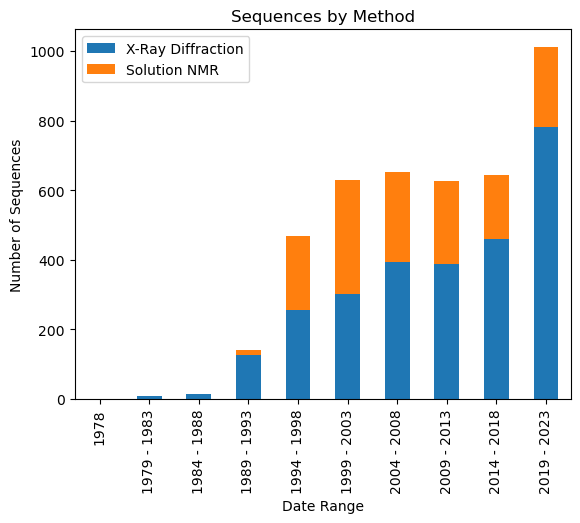

In [14]:
# Chart our data, give it a title, and label the axes **STACKED**
release_chart_by_type = release_by_method.plot(kind="bar", title="Sequences by Method", stacked = True)
release_chart_by_type.set_xlabel("Date Range")
release_chart_by_type.set_ylabel("Number of Sequences")
plt.savefig('Images/Sequence_by_method_stacked.jpg', format = 'jpg', dpi = 1200)
plt.show()

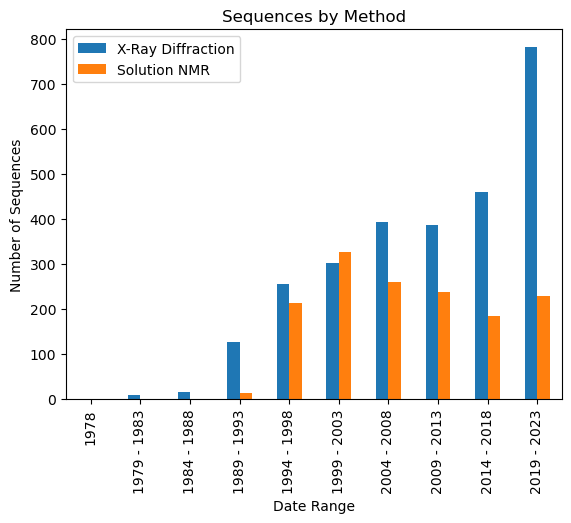

In [15]:
# Chart our data, give it a title, and label the axes **NOT STACKED**
release_chart_by_type = release_by_method.plot(kind="bar", title="Sequences by Method")
release_chart_by_type.set_xlabel("Date Range")
release_chart_by_type.set_ylabel("Number of Sequences")
plt.savefig('Images/Sequence_by_method.jpg', format = 'jpg', dpi = 1200)
plt.show()

In [16]:
dna_rna_clean.columns

Index(['Experimental Method', 'Release Date', 'Ligand', 'Value', 'Symbol',
       'Type', 'Unit', 'PDB ID', 'Molecular Weight per Deposited Model',
       'Number of Distinct DNA Entities',
       'Number of Distinct Protein Entities', 'Resolution (Å)',
       'Stucture Keywords', 'Date Group'],
      dtype='object')

In [17]:
# Group by Structure by date
# Create DF for DNA
dna_group = dna_rna_clean.loc[dna_rna_clean['Stucture Keywords'] == "DNA"]
dna_grouped = dna_group.groupby('Date Group')
# Create chart data
dna_release = dna_grouped['Release Date'].count()

# Create DF for RNA
rna_group = dna_rna_clean.loc[dna_rna_clean['Stucture Keywords'] == "RNA"]
rna_grouped = rna_group.groupby('Date Group')
# Create chart data
rna_release = rna_grouped['Release Date'].count()

# Create DF for Hybrid
hybrid_group = dna_rna_clean.loc[dna_rna_clean['Stucture Keywords'] == "DNA-RNA HYBRID"]
hybrid_grouped = hybrid_group.groupby('Date Group')
# Create chart data
hybrid_release = hybrid_grouped['Release Date'].count()

# Put them into one DF
release_by_structure1 = pd.merge(dna_release, rna_release, left_index=True, right_index=True).rename(
    columns = {'Release Date_x':'DNA', 'Release Date_y':'RNA'})
release_by_structure = pd.merge(release_by_structure1, hybrid_release, left_index=True, right_index=True).rename(
    columns = {'Release Date':'DNA-RNA HYBRID'})
release_by_structure


,DNA,RNA,DNA-RNA HYBRID
Date Group,,,
1978,0,0,0
1979 - 1983,7,0,0
1984 - 1988,9,1,0
1989 - 1993,133,3,4
1994 - 1998,331,98,21
1999 - 2003,368,209,23
2004 - 2008,291,341,3
2009 - 2013,315,283,0
2014 - 2018,287,322,3


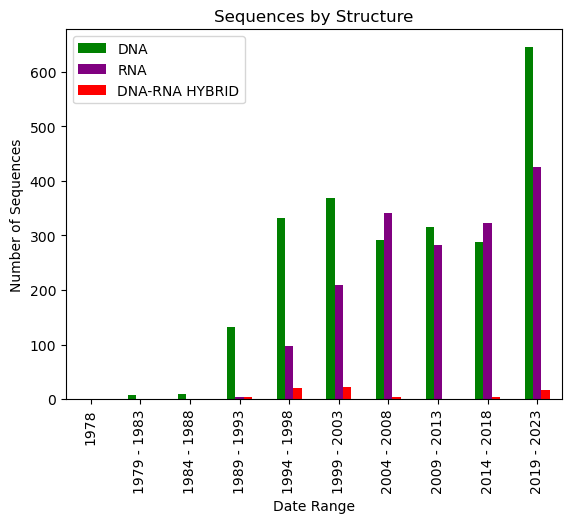

In [18]:
# Chart our data, give it a title, and label the axes **NOT STACKED**
colors = ['green', 'purple', 'red']
release_chart_by_structure = release_by_structure.plot(kind="bar", title="Sequences by Structure", color = colors)
release_chart_by_structure.set_xlabel("Date Range")
release_chart_by_structure.set_ylabel("Number of Sequences")
plt.savefig('Images/Sequence_by_structure.jpg', format = 'jpg', dpi = 1200)
plt.show()



In [19]:
# Find size distribution by structure
# For DNA group, filter out the outliers above 2,000 and check the new max
dna_group = dna_group.loc[(dna_group['Molecular Weight per Deposited Model'] <= 2000)]
dna_max = dna_group['Molecular Weight per Deposited Model'].max()
dna_max

1847.04

The lower quartile of Molecular Weight is: 5.14
The upper quartile of Molecular Weight is: 8.807500000000001
The interquartile range of Molecular Weight is: 3.6675000000000013
The the median of Molecular Weight is: 7.3149999999999995 
Values below -0.36125000000000274 could be outliers.
Values above 14.308750000000003 could be outliers.


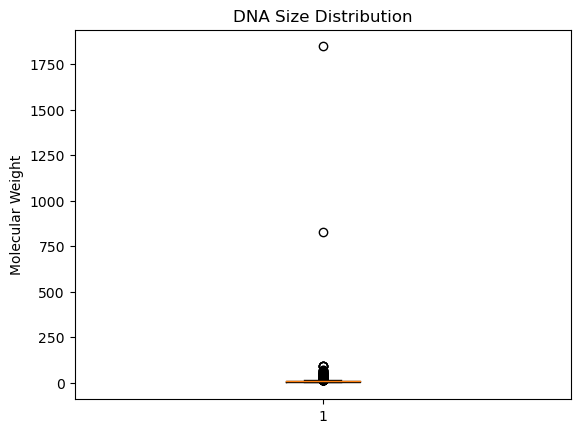

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_title('DNA Size Distribution')
ax1.set_ylabel('Molecular Weight')
ax1.boxplot(dna_group["Molecular Weight per Deposited Model"])

# Quartile calculations
d_quartiles = dna_group["Molecular Weight per Deposited Model"].quantile([.25,.5,.75])
d_lowerq = d_quartiles[0.25]
d_upperq = d_quartiles[0.75]
d_iqr = d_upperq-d_lowerq

print(f"The lower quartile of Molecular Weight is: {d_lowerq}")
print(f"The upper quartile of Molecular Weight is: {d_upperq}")
print(f"The interquartile range of Molecular Weight is: {d_iqr}")
print(f"The the median of Molecular Weight is: {d_quartiles[0.5]} ")

d_lower_bound = d_lowerq - (1.5*d_iqr)
d_upper_bound = d_upperq + (1.5*d_iqr)
print(f"Values below {d_lower_bound} could be outliers.")
print(f"Values above {d_upper_bound} could be outliers.")
plt.savefig('Images/DNA_size_distribution.jpg', format = 'jpg', dpi = 1200)
plt.show()


The lower quartile of Molecular Weight is: 7.805
The upper quartile of Molecular Weight is: 28.43
The interquartile range of Molecular Weight is: 20.625
The the median of Molecular Weight is: 13.78 
Values below -23.1325 could be outliers.
Values above 59.3675 could be outliers.


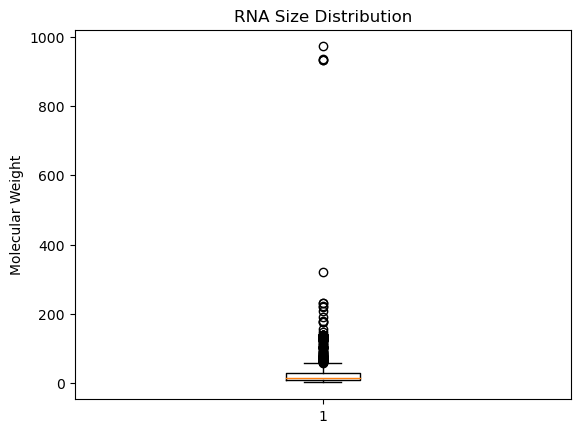

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_title('RNA Size Distribution')
ax1.set_ylabel('Molecular Weight')
ax1.boxplot(rna_group["Molecular Weight per Deposited Model"])
# Quartile calculations
r_quartiles = rna_group["Molecular Weight per Deposited Model"].quantile([.25,.5,.75])
r_lowerq = r_quartiles[0.25]
r_upperq = r_quartiles[0.75]
r_iqr = r_upperq-r_lowerq

print(f"The lower quartile of Molecular Weight is: {r_lowerq}")
print(f"The upper quartile of Molecular Weight is: {r_upperq}")
print(f"The interquartile range of Molecular Weight is: {r_iqr}")
print(f"The the median of Molecular Weight is: {r_quartiles[0.5]} ")

r_lower_bound = r_lowerq - (1.5*r_iqr)
r_upper_bound = r_upperq + (1.5*r_iqr)
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")
plt.savefig('Images/RNA_size_distribution.jpg', format = 'jpg', dpi = 1200)
plt.show()

The lower quartile of Molecular Weight is: 5.93
The upper quartile of Molecular Weight is: 7.4350000000000005
The interquartile range of Molecular Weight is: 1.5050000000000008
The the median of Molecular Weight is: 6.27 
Values below 3.6724999999999985 could be outliers.
Values above 9.692500000000003 could be outliers.


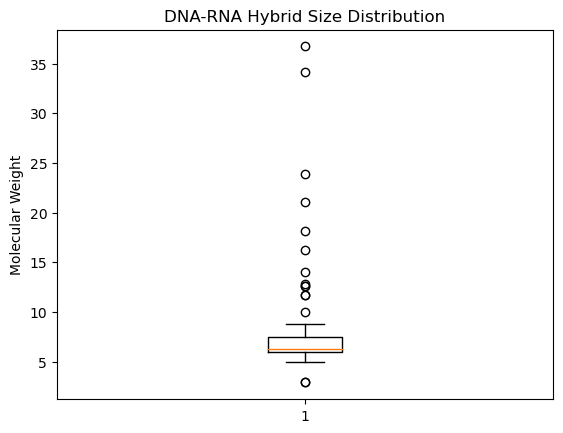

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('DNA-RNA Hybrid Size Distribution')
ax1.set_ylabel('Molecular Weight')
ax1.boxplot(hybrid_group["Molecular Weight per Deposited Model"])
# Quartile calculations
h_quartiles = hybrid_group["Molecular Weight per Deposited Model"].quantile([.25,.5,.75])
h_lowerq = h_quartiles[0.25]
h_upperq = h_quartiles[0.75]
h_iqr = h_upperq-h_lowerq

print(f"The lower quartile of Molecular Weight is: {h_lowerq}")
print(f"The upper quartile of Molecular Weight is: {h_upperq}")
print(f"The interquartile range of Molecular Weight is: {h_iqr}")
print(f"The the median of Molecular Weight is: {h_quartiles[0.5]} ")

h_lower_bound = h_lowerq - (1.5*h_iqr)
h_upper_bound = h_upperq + (1.5*h_iqr)
print(f"Values below {h_lower_bound} could be outliers.")
print(f"Values above {h_upper_bound} could be outliers.")
plt.savefig('Images/Hybrid_size_distribution.jpg', format = 'jpg', dpi = 1200)
plt.show()